In [3]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import naive_bayes
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn import cluster
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
df.head()

,Neighborhood,BldClassif,YearBuilt,GrossSqFt,GrossIncomeSqFt,MarketValueperSqFt
0,0,0,1926,239121,34.0,158.0
1,0,1,1909,51387,36.5,170.0
2,0,1,1911,167448,35.8,167.0
3,1,2,1910,9530,41.0,201.0
4,2,0,1923,182200,31.8,148.0


In [6]:
df = pd.read_csv('manhattan-dof.csv',index_col=False,delimiter=',')
df_x = df.ix[:,2:]
df_y = df.ix[:,1]

X = df_x.as_matrix()
Y = df_y.as_matrix()

# --------------------
# Normalizing data
# --------------------
Xtmax = np.amax(X,axis=0)
X = np.divide(X,Xtmax)

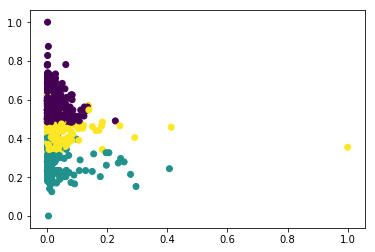

In [20]:
# --------------------
# Clustering
# --------------------

## Kmeans
km = cluster.KMeans(n_clusters=3, random_state=0)
km.fit(X)
cl = km.labels_
plt.scatter(X[:,1],X[:,2],c=cl)

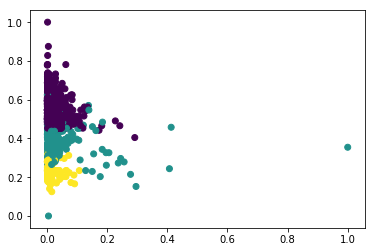

In [21]:
# Hierarchical
hc = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')
hc.fit(X)
cl = hc.labels_

plt.scatter(X[:,1],X[:,2],c=cl)

In [36]:
# --------------------
# K-fold CV
# --------------------
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=3)
ts, = Y_test.shape

# --------------------
# Naive Bayes
# --------------------
gnb = naive_bayes.GaussianNB()
gnb.fit(X_train,Y_train)
ypred_gnb = gnb.predict(X_test)
e_gnb = np.sum((ypred_gnb[i] != Y_test[i]) for i in range(0,ts))
print("----------Naive Bayes----------")
print e_gnb, "misclassified data out of",ts,"(",float(e_gnb)*100/ts,"%)"

----------Naive Bayes----------
209 misclassified data out of 794 ( 26.322418136 %)


In [37]:
# --------------------
# SVM
# --------------------
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train,Y_train)
ypred_svm_linear = svm_linear.predict(X_test)
e_svm_linear = np.sum((ypred_svm_linear[i] != Y_test[i]) for i in range(0,ts))
print("----------SVM Linear----------")
print e_svm_linear, "misclassified data out of", ts, "(",float(e_svm_linear)*100/ts,"%)"

----------SVM Linear----------
246 misclassified data out of 794 ( 30.9823677582 %)


In [48]:
class_weight={0:10} #give a larger importance to class 0
svm_rbf = svm.SVC(kernel='rbf', gamma=500, class_weight={0:10})
# svm_rbf = svm.SVC(kernel='rbf', gamma=500)
svm_rbf.fit(X_train,Y_train)
ypred_svm_rbf = svm_rbf.predict(X_test)
e_svm_rbf = np.sum((ypred_svm_rbf[i] != Y_test[i]) for i in range(0,ts))
print("----------SVM RBF----------")
print("number of support vectors",len(svm_rbf.support_))
print e_svm_rbf, "misclassified data out of", ts, "(",float(e_svm_rbf)*100/ts,"%)"

----------SVM RBF----------
('number of support vectors', 1134)
227 misclassified data out of 794 ( 28.5894206549 %)


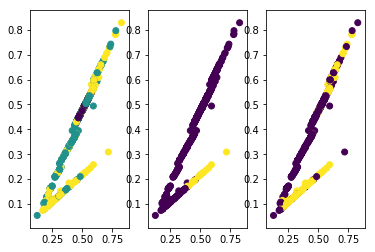

In [59]:
# --------------------
# SVM_RBF (analyzing gamma)
# --------------------
l=[]
# for g in range(1,500,2):
#    svm_rbf = svm.SVC(kernel='rbf', gamma=float(g))
#    svm_rbf.fit(X_train,Y_train)
#    ypred_svm_rbf = svm_rbf.predict(X_test)
#    e_svm_rbf = np.sum((ypred_svm_rbf[i] != Y_test[i]) for i in range(0,ts))
#    l.append(e_svm_rbf/ts)

# plt.plot(l)

plt.subplot(1,3,1)
plt.scatter(X_test[:,2],X_test[:,3],c=ypred_gnb)
plt.subplot(1,3,2)
plt.scatter(X_test[:,2],X_test[:,3],c=ypred_svm_linear)
plt.subplot(1,3,3)
plt.scatter(X_test[:,2],X_test[:,3],c=ypred_svm_rbf)
# svm_rbf_sv = svm_rbf.support_
# plt.scatter(X[svm_rbf_sv,2],X[svm_rbf_sv,3],color="red")
plt.show()

In [41]:
set(Y)

{0, 1, 2, 3}

In [51]:
# Changing GAMMA
class_weight={0:10} #give a larger importance to class 0
svm_rbf = svm.SVC(kernel='rbf', gamma=300, class_weight={0:10})
# svm_rbf = svm.SVC(kernel='rbf', gamma=500)
svm_rbf.fit(X_train,Y_train)
ypred_svm_rbf = svm_rbf.predict(X_test)
e_svm_rbf = np.sum((ypred_svm_rbf[i] != Y_test[i]) for i in range(0,ts))
print("----------SVM RBF----------")
print("number of support vectors",len(svm_rbf.support_))
print e_svm_rbf, "misclassified data out of", ts, "(",float(e_svm_rbf)*100/ts,"%)"

----------SVM RBF----------
('number of support vectors', 1134)
239 misclassified data out of 794 ( 30.1007556675 %)


In [52]:
# Changing GAMMA
class_weight={0:10} #give a larger importance to class 0
svm_rbf = svm.SVC(kernel='rbf', gamma=100, class_weight={0:10})
# svm_rbf = svm.SVC(kernel='rbf', gamma=500)
svm_rbf.fit(X_train,Y_train)
ypred_svm_rbf = svm_rbf.predict(X_test)
e_svm_rbf = np.sum((ypred_svm_rbf[i] != Y_test[i]) for i in range(0,ts))
print("----------SVM RBF----------")
print("number of support vectors",len(svm_rbf.support_))
print e_svm_rbf, "misclassified data out of", ts, "(",float(e_svm_rbf)*100/ts,"%)"

----------SVM RBF----------
('number of support vectors', 1161)
256 misclassified data out of 794 ( 32.241813602 %)


In [53]:
# Changing GAMMA
class_weight={0:10} #give a larger importance to class 0
svm_rbf = svm.SVC(kernel='rbf', gamma=500, class_weight={0:10})
# svm_rbf = svm.SVC(kernel='rbf', gamma=500)
svm_rbf.fit(X_train,Y_train)
ypred_svm_rbf = svm_rbf.predict(X_test)
e_svm_rbf = np.sum((ypred_svm_rbf[i] != Y_test[i]) for i in range(0,ts))
print("----------SVM RBF----------")
print("number of support vectors",len(svm_rbf.support_))
print e_svm_rbf, "misclassified data out of", ts, "(",float(e_svm_rbf)*100/ts,"%)"

----------SVM RBF----------
('number of support vectors', 1134)
227 misclassified data out of 794 ( 28.5894206549 %)


In [57]:
# Changing GAMMA
class_weight={0:10} #give a larger importance to class 0
svm_rbf = svm.SVC(kernel='rbf', gamma=1000, class_weight={0:10})
# svm_rbf = svm.SVC(kernel='rbf', gamma=500)
svm_rbf.fit(X_train,Y_train)
ypred_svm_rbf = svm_rbf.predict(X_test)
e_svm_rbf = np.sum((ypred_svm_rbf[i] != Y_test[i]) for i in range(0,ts))
print("----------SVM RBF----------")
print("number of support vectors",len(svm_rbf.support_))
print e_svm_rbf, "misclassified data out of", ts, "(",float(e_svm_rbf)*100/ts,"%)"

----------SVM RBF----------
('number of support vectors', 1109)
208 misclassified data out of 794 ( 26.1964735516 %)


In [66]:
# --------------------
# SVM_RBF (analyzing gamma)
# --------------------
l=[]
for g in range(1,500,2):
   svm_rbf = svm.SVC(kernel='rbf', gamma=float(g))
   svm_rbf.fit(X_train,Y_train)
   ypred_svm_rbf = svm_rbf.predict(X_test)
   e_svm_rbf = np.sum((ypred_svm_rbf[i] != Y_test[i]) for i in range(0,ts))
   l.append(float(e_svm_rbf)/ts)

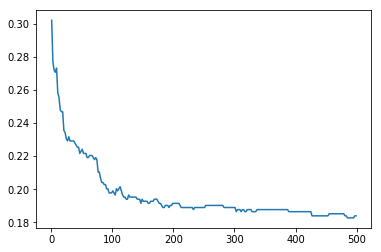

In [71]:
plt.plot(range(1,500,2),l)

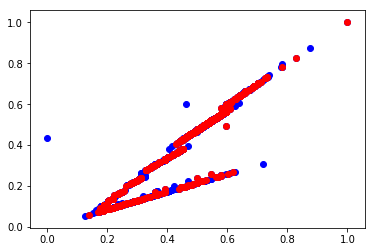

In [73]:
svm_rbf_sv = svm_rbf.support_
plt.scatter(X[:,2],X[:,3],color='blue')
plt.scatter(X[svm_rbf_sv,2],X[svm_rbf_sv,3],color="red")
plt.show()

In [76]:
X[svm_rbf_sv].shape

(920, 4)

In [79]:
X.shape

(2645, 4)

In [82]:
svm_rbf.support_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=499.0, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)